# Regression model

## Project:  Predicting computer performance 

#### In this project,I'm going to predict the computer performance with some features given such as cycle time,minimum main  memory,maximum main memory etc..

## 1.Importing libraries
#### Import all the libraries which may be useful for this project

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

## 2.Load Data
#### I'm going to load data from uci repositories website
#### head() helps us to show only upto 5 rows of our data
#### I am using it to avoid mess 

In [2]:
com=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data",delimiter=',')
com.head()

,adviser,32/60,125,256,6000,256.1,16,128,198,199
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290


## 3.Data Preparation

#### In this step the data is prepared for our model.So,now I will remove incorrect column names and add the correct one.So the correct columns are:
#### 1.vendor name
#### 2.Model Name
#### 3. MYCT: machine cycle time in nanoseconds (integer) 
#### 4. MMIN: minimum main memory in kilobytes (integer) 
#### 5. MMAX: maximum main memory in kilobytes (integer) 
#### 6. CACH: cache memory in kilobytes (integer) 
#### 7. CHMIN: minimum channels in units (integer) 
#### 8. CHMAX: maximum channels in units (integer) 
#### 9. PRP: published relative performance (integer) 
#### 10. ERP: estimated relative performance from the original article (integer)

In [3]:
cols1=com.columns=['vendor name','Model Name','MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP','ERP']

#### Data with corrected columns:

In [4]:
com.head()

,vendor name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290


#### Check whether there are any null values in my data.If i find any null values
#### We can use DataFrame.dropna() to remove the rows with null values

In [5]:
for col in com.columns:
    print(com[col].isna().value_counts())

False    208
Name: vendor name, dtype: int64
False    208
Name: Model Name, dtype: int64
False    208
Name: MYCT, dtype: int64
False    208
Name: MMIN, dtype: int64
False    208
Name: MMAX, dtype: int64
False    208
Name: CACH, dtype: int64
False    208
Name: CHMIN, dtype: int64
False    208
Name: CHMAX, dtype: int64
False    208
Name: PRP, dtype: int64
False    208
Name: ERP, dtype: int64


#### Sometimes null values are stored as '?' instead of nan
#### So,Extract Unique values for finding the unique values if we find any odd data in our dataset we will remove them

In [6]:
for col in com.drop(['vendor name','Model Name'],axis=1):
    print(com[col].unique())

[  29   26   23  400   60   50  350  200  167  143  110  320   25   56
   64  133  810  700  140  220  800  125   75   90  105  175  300  180
  330   57  480  203  115 1100  600  900  225  185   17 1500  100  150
   92   72   40   35   38   48   30  112   84  250  160  240   52   70
   59  116  124   98]
[ 8000 16000 32000  1000   512  2000  4000    64   524  5000  1500  3100
  2300   128   256  1310  2620  5240   500   384  3000   768   192    96
   262]
[32000 16000 64000  3000  3500  8000    64  2000  5000  6300  6200  6000
  2620 10480 20970  4000 12000   512  1000  4500   768 24000  1500]
[ 32  64 128   0   4  65   8 142 131  30   9  16   6   1   2  24  48  12
 256 160 112  96]
[ 8 16 32  1  4  7  5  6 12  3  2  0 24 26 52]
[ 32  16  64   2   6   8   4  15  20  12   3   5  24   1  38  10  19  48
  31 112  54   0 128   7  14  13  28  26  52 104 176]
[ 269  220  172  132  318  367  489  636 1144   38   40   92  138   10
   35   19   28   31  120   30   33   61   76   23   69   27   

#### So,here there are no missing values

## 4.Data Exploration
#### Data Explorative process is a fundamental practice to help you better understand and justify your results.
#### These statistics will be extremely important later on to analyze various prediction results from the constructed model.
#### In python we can do it by DataFrame.describe() method

In [347]:
com.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,204.201923,2880.538462,11824.019231,24.096154,4.644231,17.740385,105.177885,98.850962
std,260.833016,3883.839300,11747.916663,37.417999,6.787198,24.913375,161.090223,154.974961
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,49.500000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,111.500000,99.500000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


#### For better understanding of performance we can plot a box plot.

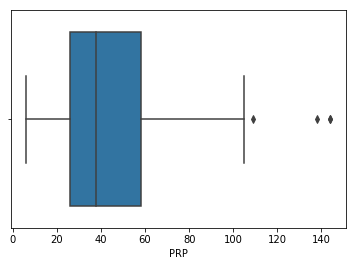

In [350]:
import seaborn as sns
sns.boxplot(x=com1['PRP'])

#### I have tried to remove all the outliers in the data.
#### But it resulted in reduction of too much data and hence reduced my model performance.
#### So the performance is better when I implement as it is.

## 5.Randomly Splitting data into train and test

##### Check all the model performances and choose the best fit 

##### So,I am going for random forest regressor

##### Choose features for training and labels for testing

In [7]:
com.head()

,vendor name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290


In [11]:
X=com[['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX']]
y=com['PRP']

##### split train and test using train_test_split()

In [261]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.225,random_state=25)

In [262]:
print(train_X.shape)
print(test_X.shape)

(161, 6)
(47, 6)


##### I have checked performance of all the models and the best one is RandomForestRegression for my data

In [271]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

##### HyperParameterTuning is the neccessary part to improve the model performance
##### So one of the method for HyperParameter tuning is RandomizedSearchCV() which will search on hyper parameters and returns the best one
##### For RandomizedSearchCV() I've to choose some parameters for testing 
##### After Fitting all our given parameters it returns the best list of parameters that fit our data well
##### So,The following are the parameters that I'm going to give for RandomizedSearchCV to find the best among them

In [272]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

##### I'm going to save all these parameters in the form of dictionary as random_grid for ease

In [273]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf   
              }

##### Implement RandomizedSearchCV and fit our training data to it.
##### Other parameters used in this are:
##### 1.Verbose:Controls the expansiveness: the higher, the more messages and if higher the verbose the implementation will slowed down
##### 2.n_jobs = -1 :means,using all processors

In [275]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(train_X, train_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   45.8s finished
C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

##### The best RandomForestRegression parameters for this is

In [458]:
rf1=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=12, verbose=0, warm_start=False)
rf1.fit(train_X,train_y)

C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=12, verbose=0, warm_start=False)

##### predict train values

In [459]:
pred=rf1.predict(train_X)

##### let's predict test values

In [460]:
pred1=rf1.predict(test_X)

#### calculating mean absolute errors to the values predicted in train set and test set
#### error=mean(|original_value-pred|)

In [461]:
errors=abs(pred-train_y)
errors1=abs(pred1-test_y)
print(np.mean(errors))
print(np.mean(errors1))

14.605144927536232
19.395


##### MAE in train set is 14.60
##### MAE in test set is 19.39

##### score of the predictive model for train set and test set

In [462]:
print(rf1.score(train_X,train_y))
print(rf1.score(test_X,test_y))

0.9657542983548043
0.9484238972259477


##### The score of my test set is 0.94

#### The mean absolute percentage error (MAPE), also known as mean absolute percentage deviation (MAPD), is a measure of prediction accuracy of a forecasting method in statistics
#### MAPE=100*(mean(|original_value-pred|)/original_value)
#### We can calculate accuracy by:
#### accuracy = 100-mean(MAPE)

In [467]:
mape=100*(errors1/test_y)
accuracy1=100-np.mean(mape)

In [468]:
accuracy1

73.13809660225718

##### So accuracy is 73.13

##### Predictions:

##### Consider you have a new computer with the given features
##### cycle time:30 nanoseconds
##### minimum main memery : 10000 kilobytes
##### maximum main memory : 32000 kilobytes
##### Cache memory : 64 kilobytes
##### Minimum channels : 8 units
##### Maximum channels : 64 units

In [469]:
data=[[30,10000,32000,64,8,64]]
perfmc=[]
per=rf1.predict(data)

In [470]:
per

array([316.9])

##### So my predicted relative performance is 379.78
##### Note: The data taken is just for an example.The accuracy between the published and my predictive model is given above.